In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm
import category_encoders as ce
from category_encoders.one_hot import OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
from importlib import reload
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

In [2]:
#Load Data
data = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [3]:
%matplotlib inline
data.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [5]:
data.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [6]:
# Fast way to separate numeric columns
data.describe().columns

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')

In [7]:
# Look at numeric and categorical values separately 
df_num = data[['Age', 'Height', 'Weight']]
df_cat = data[['Gender', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad']]

             Age    Height    Weight
Age     1.000000 -0.025958  0.202560
Height -0.025958  1.000000  0.463136
Weight  0.202560  0.463136  1.000000


<AxesSubplot:>

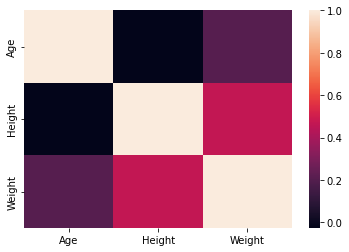

In [8]:
print(df_num.corr())
sns.heatmap(df_num.corr())

In [9]:
# Compare NObeyesdad levels across Age, Height, Weight
pd.pivot_table(data, index = 'NObeyesdad', values = ['Age','Height','Weight'])

,Age,Height,Weight
NObeyesdad,,,
Insufficient_Weight,19.783237,1.691117,49.906330
Normal_Weight,21.738676,1.676585,62.155052
Obesity_Type_I,25.884941,1.693804,92.870198
Obesity_Type_II,28.233785,1.771795,115.305311
Obesity_Type_III,23.495554,1.687559,120.941114
Overweight_Level_I,23.417674,1.687836,74.266828
Overweight_Level_II,26.996981,1.703748,82.085271


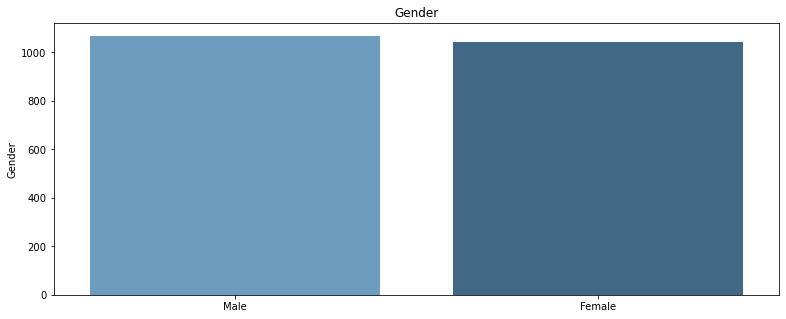

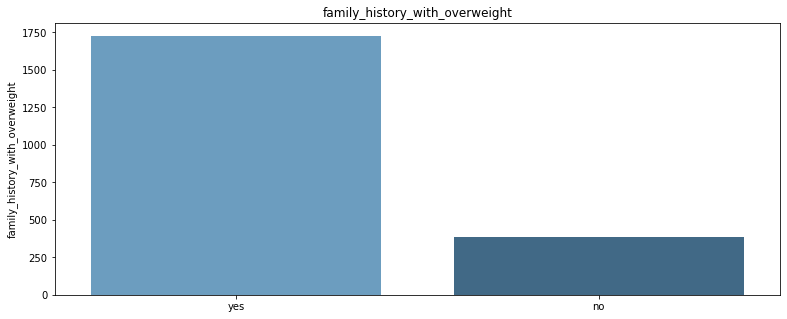

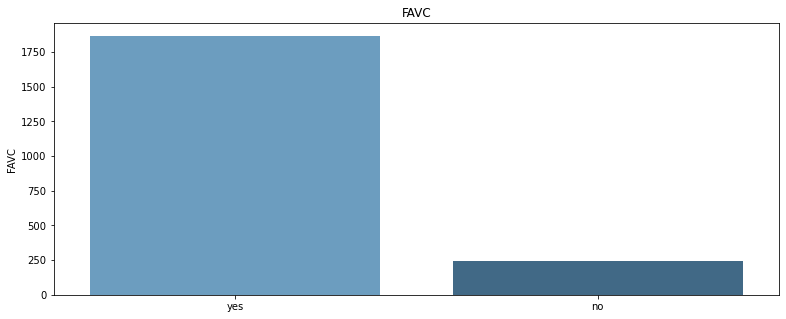

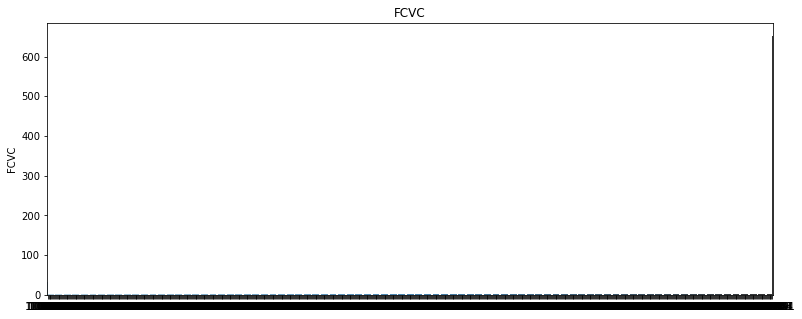

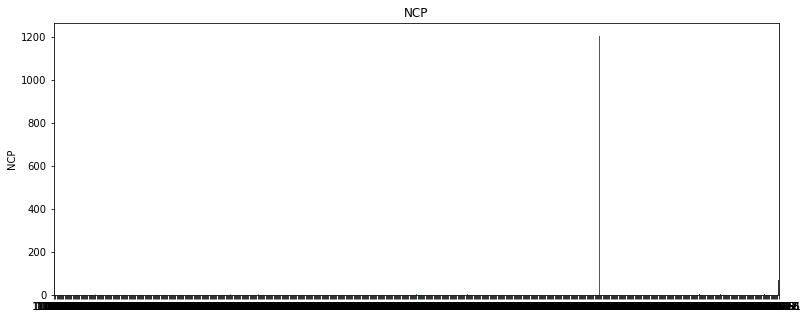

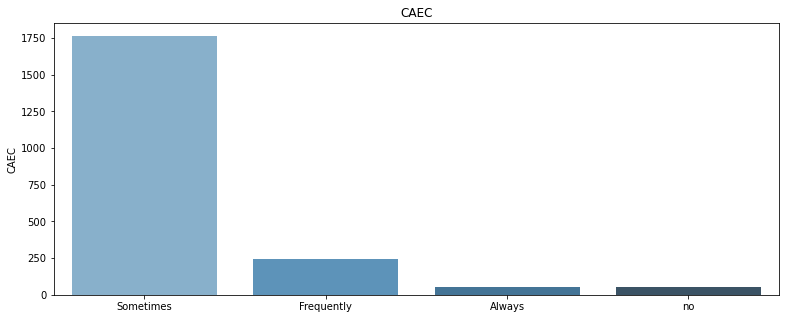

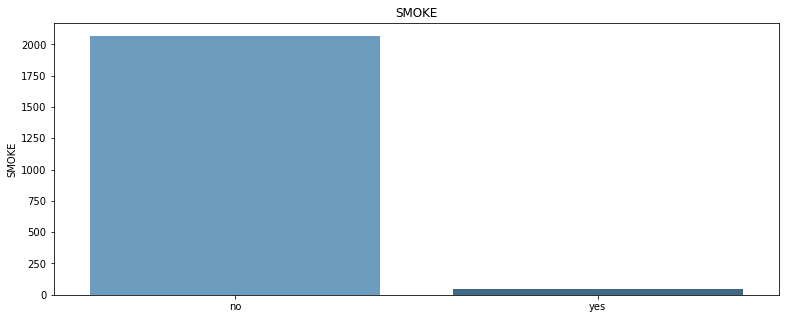

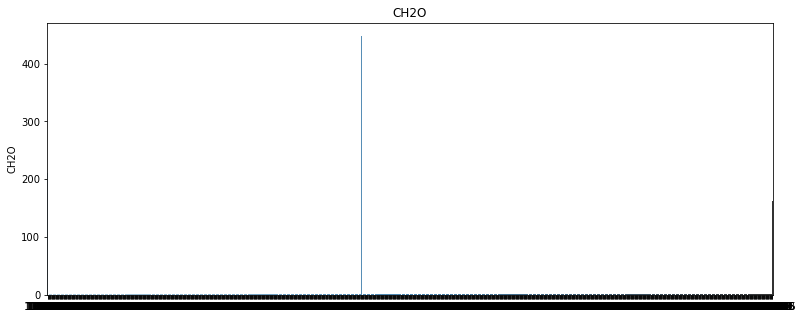

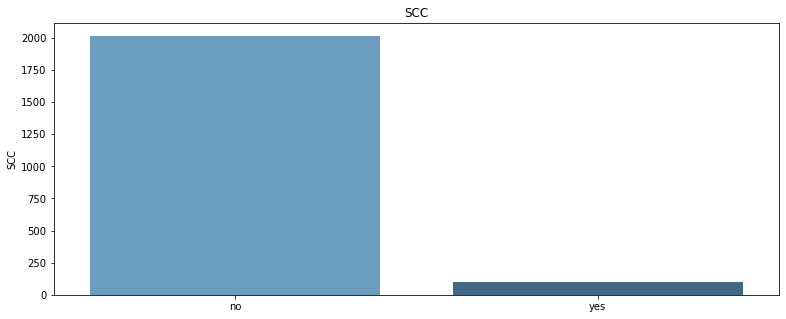

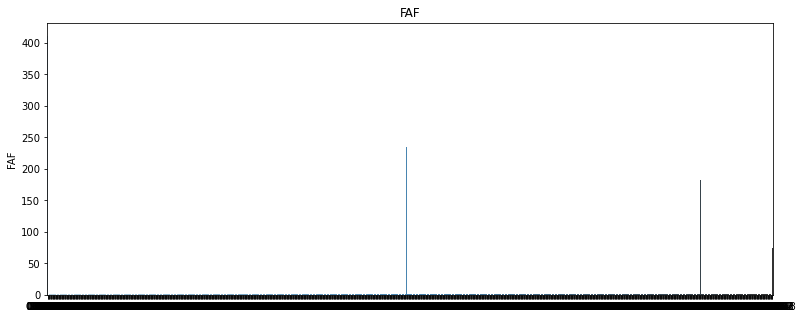

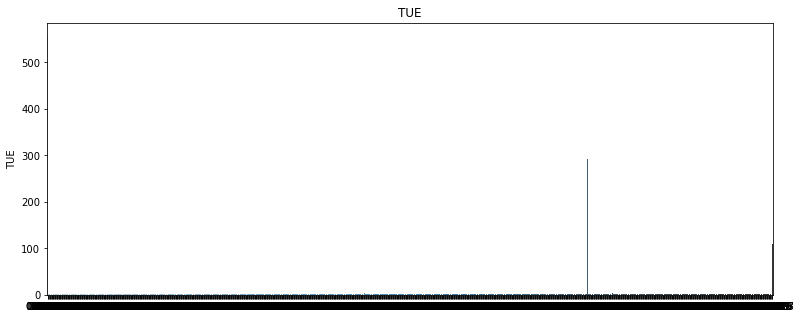

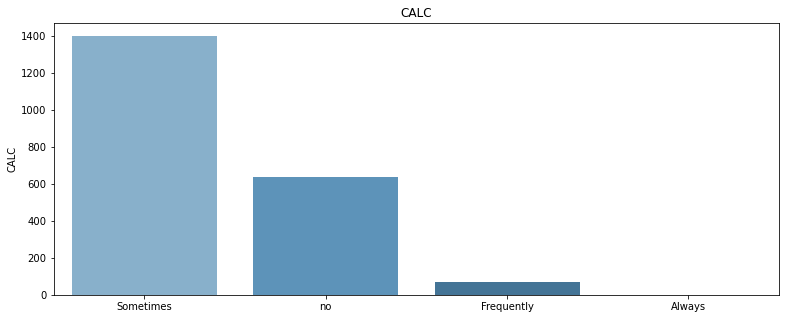

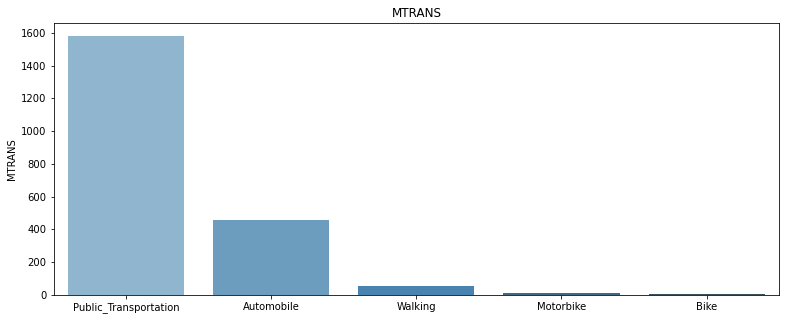

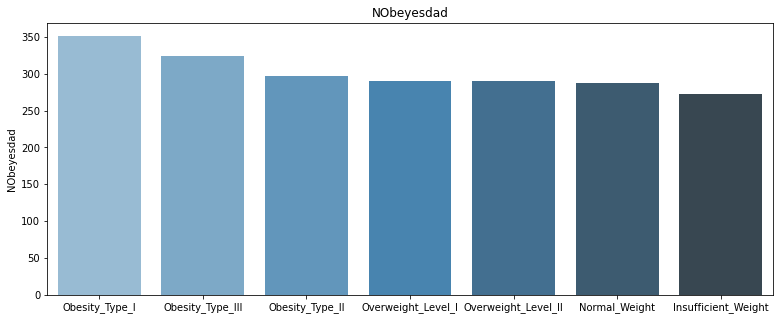

In [10]:
# Categorical variables
for i in df_cat.columns:
    plt.figure(figsize=(13, 5))
    sns.barplot(df_cat[i].value_counts().index,df_cat[i].value_counts(), palette="Blues_d").set_title(i)
    plt.show()

In [11]:
# Comparing NObeyesdad and each of these categorical variables 
print(pd.pivot_table(data, index = 'NObeyesdad', columns = 'Gender', values = 'FAF' ,aggfunc ='count'))
print()
print(pd.pivot_table(data, index = 'NObeyesdad', columns = 'family_history_with_overweight', values = 'FAF' ,aggfunc ='count'))
print()
print(pd.pivot_table(data, index = 'NObeyesdad', columns = 'FAVC', values = 'FAF' ,aggfunc ='count'))
print()
print(pd.pivot_table(data, index = 'NObeyesdad', columns = 'CAEC', values = 'FAF' ,aggfunc ='count'))
print()
print(pd.pivot_table(data, index = 'NObeyesdad', columns = 'SMOKE', values = 'FAF' ,aggfunc ='count'))
print()
print(pd.pivot_table(data, index = 'NObeyesdad', columns = 'SCC', values = 'FAF' ,aggfunc ='count'))
print()
print(pd.pivot_table(data, index = 'NObeyesdad', columns = 'CALC', values = 'FAF' ,aggfunc ='count'))
print()
print(pd.pivot_table(data, index = 'NObeyesdad', columns = 'MTRANS', values = 'FAF' ,aggfunc ='count'))

Gender               Female  Male
NObeyesdad                       
Insufficient_Weight     173    99
Normal_Weight           141   146
Obesity_Type_I          156   195
Obesity_Type_II           2   295
Obesity_Type_III        323     1
Overweight_Level_I      145   145
Overweight_Level_II     103   187

family_history_with_overweight     no    yes
NObeyesdad                                  
Insufficient_Weight             146.0  126.0
Normal_Weight                   132.0  155.0
Obesity_Type_I                    7.0  344.0
Obesity_Type_II                   1.0  296.0
Obesity_Type_III                  NaN  324.0
Overweight_Level_I               81.0  209.0
Overweight_Level_II              18.0  272.0

FAVC                 no  yes
NObeyesdad                  
Insufficient_Weight  51  221
Normal_Weight        79  208
Obesity_Type_I       11  340
Obesity_Type_II       7  290
Obesity_Type_III      1  323
Overweight_Level_I   22  268
Overweight_Level_II  74  216

CAEC                 Alwa

In [12]:
df = data.copy()

In [13]:
df['Age'] = df['Age'].apply(lambda age : round(age)) 
df['Height'] = df['Height'].apply(lambda height : round(height, 2)) 
df['Weight'] = df['Weight'].apply(lambda weight : round(weight)) 
df['FCVC'] = data['FCVC'].apply(lambda fcvc : round(fcvc)) 
df['NCP'] = df['NCP'].apply(lambda ncp : round(ncp)) 
df['CH2O'] = df['CH2O'].apply(lambda ch2o : round(ch2o)) 
df['FAF'] = df['FAF'].apply(lambda faf : round(faf)) 
df['TUE'] = df['TUE'].apply(lambda tue : round(tue))

In [14]:
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,1.62,64,yes,no,2,3,Sometimes,no,2,no,0,1,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56,yes,no,3,3,Sometimes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77,yes,no,2,3,Sometimes,no,2,no,2,1,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87,no,no,3,3,Sometimes,no,2,no,2,0,Frequently,Walking,Overweight_Level_I
4,Male,22,1.78,90,no,no,2,1,Sometimes,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,21,1.71,131,yes,yes,3,3,Sometimes,no,2,no,2,1,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,22,1.75,134,yes,yes,3,3,Sometimes,no,2,no,1,1,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,23,1.75,134,yes,yes,3,3,Sometimes,no,2,no,1,1,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24,1.74,133,yes,yes,3,3,Sometimes,no,3,no,1,1,Sometimes,Public_Transportation,Obesity_Type_III


# Data Visualization

<AxesSubplot:xlabel='NObeyesdad', ylabel='count'>

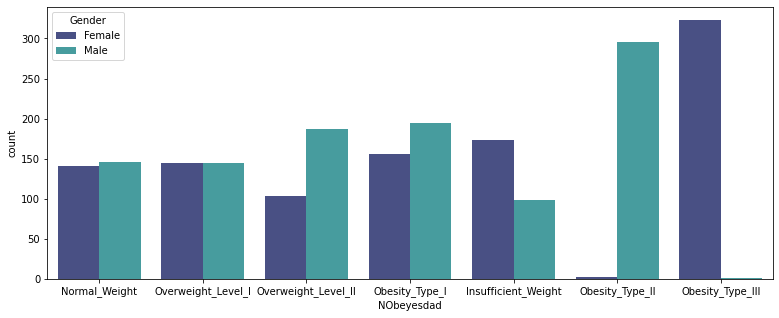

In [15]:
plt.figure(figsize=(13,5)) 
sns.countplot(x='NObeyesdad', hue='Gender', data=df, palette='mako')

<AxesSubplot:xlabel='NObeyesdad', ylabel='count'>

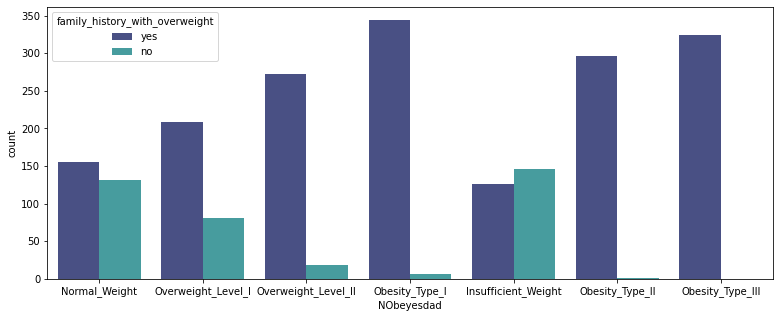

In [16]:
plt.figure(figsize=(13,5)) 
sns.countplot(x='NObeyesdad', hue='family_history_with_overweight', data=df, palette='mako')

<AxesSubplot:xlabel='NObeyesdad', ylabel='count'>

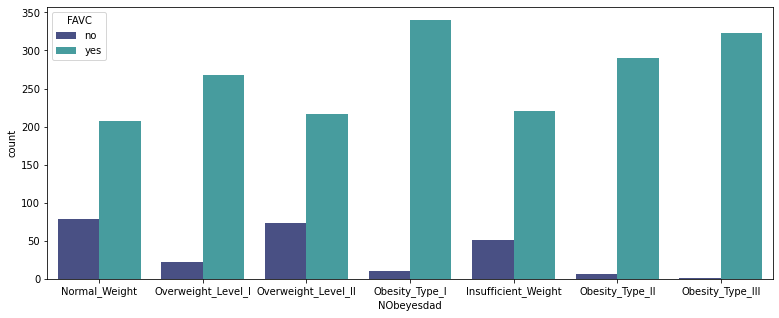

In [17]:
# Do you eat high caloric food frequently?
plt.figure(figsize=(13,5)) 
sns.countplot(x='NObeyesdad', hue='FAVC', data=df, palette='mako')

<AxesSubplot:xlabel='NObeyesdad', ylabel='count'>

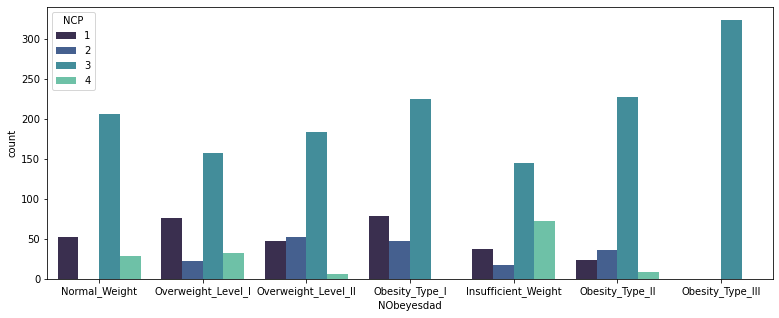

In [18]:
# How many main meals do you have daily?
plt.figure(figsize=(13,5))
sns.countplot(x='NObeyesdad', hue='NCP', data=df, palette='mako')

<AxesSubplot:xlabel='NObeyesdad', ylabel='count'>

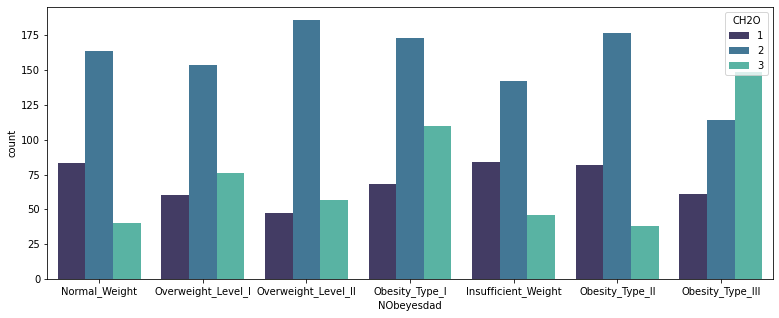

In [19]:
plt.figure(figsize=(13,5))
sns.countplot(x='NObeyesdad', hue='CH2O', data=df, palette='mako')

<AxesSubplot:xlabel='NObeyesdad', ylabel='count'>

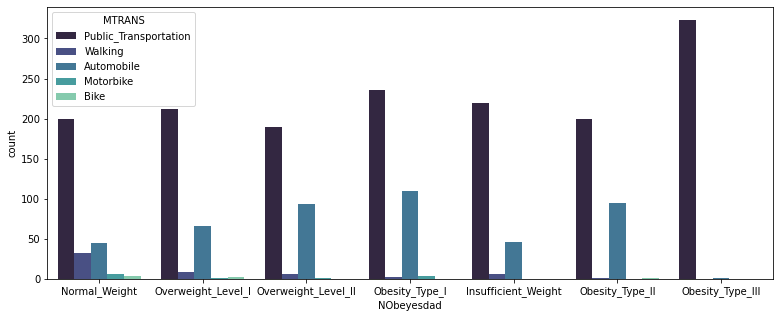

In [20]:
plt.figure(figsize=(13,5))
sns.countplot(x='NObeyesdad', hue='MTRANS', data=df, palette='mako')

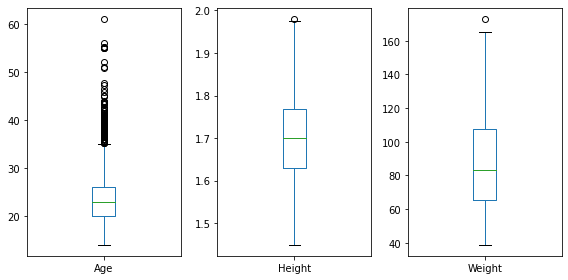

In [21]:
# Outliers Detection

plt.figure(figsize=(8,4))

for i, col in enumerate(list(df_num.columns.values)):
    plt.subplot(1,3,i+1)
    df_num.boxplot(col)
    plt.grid()
    plt.tight_layout()

In [22]:
data_outliers = df.copy()
data_outliers = data_outliers[['Age', 'Height', 'Weight']]

In [23]:
# Check outliers with Z-score: Age column
outliers = []

def find_outliers_age(data):
    cut_std = 3
    mean = np.mean(data_outliers['Age'])
    std = np.std(data_outliers['Age'])

    for dataframe in data:

        z_score = (dataframe - mean)/std
        if np.abs(z_score)>=cut_std:
            outliers.append(dataframe)

    return outliers

In [24]:
outliers = find_outliers_age(data_outliers['Age'])
outliers

[52,
 55,
 61,
 44,
 55,
 45,
 51,
 56,
 45,
 55,
 51,
 45,
 55,
 46,
 55,
 48,
 46,
 44,
 44,
 47,
 44,
 44,
 44]

In [25]:
# Check outliers with Z-score: Weight column
outliers = []

def find_outliers_weight(data):
    cut_std = 3
    mean = np.mean(data_outliers['Weight'])
    std = np.std(data_outliers['Weight'])

    for dataframe in data:

        z_score = (dataframe - mean)/std
        if np.abs(z_score)>=cut_std:
            outliers.append(dataframe)

    return outliers

In [26]:
outliers = find_outliers_weight(data_outliers['Weight'])
outliers

[173]

In [27]:
# Check outliers with Interquartile Range
# Percentile: Age column

p75, p50 = np.percentile(data_outliers['Age'],[75,50])
print('Percentil 75 - Age column: ', p75)
print('Percentil 50 (median) - Age column: ', p50)

Percentil 75 - Age column:  26.0
Percentil 50 (median) - Age column:  23.0


In [28]:
data_iqr = df.copy()

data_iqr.drop(data_iqr[(data_iqr.Weight > 169.25) | (data_iqr.Weight < 3.25)].index, inplace = True)
data_iqr.drop(data_iqr[(data_iqr.Age > 35.0) | (data_iqr.Age < 11.0)].index, inplace = True)

data_iqr

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,1.62,64,yes,no,2,3,Sometimes,no,2,no,0,1,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56,yes,no,3,3,Sometimes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77,yes,no,2,3,Sometimes,no,2,no,2,1,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87,no,no,3,3,Sometimes,no,2,no,2,0,Frequently,Walking,Overweight_Level_I
4,Male,22,1.78,90,no,no,2,1,Sometimes,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,21,1.71,131,yes,yes,3,3,Sometimes,no,2,no,2,1,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,22,1.75,134,yes,yes,3,3,Sometimes,no,2,no,1,1,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,23,1.75,134,yes,yes,3,3,Sometimes,no,2,no,1,1,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24,1.74,133,yes,yes,3,3,Sometimes,no,3,no,1,1,Sometimes,Public_Transportation,Obesity_Type_III


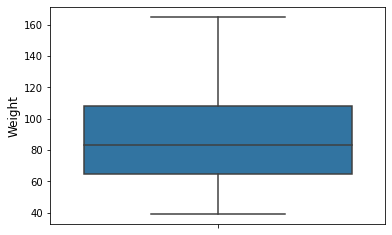

In [29]:
sns.boxplot(y = "Weight", data = data_iqr)
plt.yticks(fontsize=10)
plt.ylabel('Weight', fontsize=12)
plt.show()

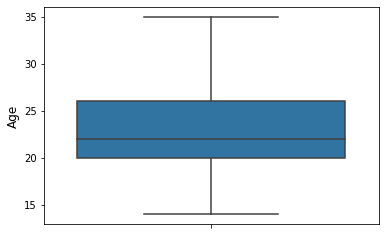

In [30]:
sns.boxplot(y = "Age", data = data_iqr)
plt.yticks(fontsize=10)
plt.ylabel('Age', fontsize=12)
plt.show()

# Data Processing

In [31]:
#  Let's have a look at how many labels each variable has
for col in data_iqr.columns:
    print(col, ': ', len(data_iqr[col].unique()), 'labels')

Gender :  2 labels
Age :  22 labels
Height :  51 labels
Weight :  117 labels
family_history_with_overweight :  2 labels
FAVC :  2 labels
FCVC :  3 labels
NCP :  4 labels
CAEC :  4 labels
SMOKE :  2 labels
CH2O :  3 labels
SCC :  2 labels
FAF :  4 labels
TUE :  3 labels
CALC :  4 labels
MTRANS :  5 labels
NObeyesdad :  7 labels


In [32]:
# Do categorical transforms on all data
# One-Hot Encoding: used for nominal categorical variables. That is, variables that have no ordering among themselves.

data_iqr_ohe = data_iqr.copy()
one_hot_enc = OneHotEncoder(cols=['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC', 'MTRANS'])
data_ohe = one_hot_enc.fit_transform(data_iqr_ohe)
data_ohe

,Gender_1,Gender_2,Age,Height,Weight,family_history_with_overweight_1,family_history_with_overweight_2,FAVC_1,FAVC_2,FCVC,...,SCC_2,FAF,TUE,CALC,MTRANS_1,MTRANS_2,MTRANS_3,MTRANS_4,MTRANS_5,NObeyesdad
0,1,0,21,1.62,64,1,0,1,0,2,...,0,0,1,no,1,0,0,0,0,Normal_Weight
1,1,0,21,1.52,56,1,0,1,0,3,...,1,3,0,Sometimes,1,0,0,0,0,Normal_Weight
2,0,1,23,1.80,77,1,0,1,0,2,...,0,2,1,Frequently,1,0,0,0,0,Normal_Weight
3,0,1,27,1.80,87,0,1,1,0,3,...,0,2,0,Frequently,0,1,0,0,0,Overweight_Level_I
4,0,1,22,1.78,90,0,1,1,0,2,...,0,0,0,Sometimes,1,0,0,0,0,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,1,0,21,1.71,131,1,0,0,1,3,...,0,2,1,Sometimes,1,0,0,0,0,Obesity_Type_III
2107,1,0,22,1.75,134,1,0,0,1,3,...,0,1,1,Sometimes,1,0,0,0,0,Obesity_Type_III
2108,1,0,23,1.75,134,1,0,0,1,3,...,0,1,1,Sometimes,1,0,0,0,0,Obesity_Type_III
2109,1,0,24,1.74,133,1,0,0,1,3,...,0,1,1,Sometimes,1,0,0,0,0,Obesity_Type_III


In [33]:
data_ohe.select_dtypes(include='object').describe()

,CAEC,CALC,NObeyesdad
count,1950,1950,1950
unique,4,4,7
top,Sometimes,Sometimes,Obesity_Type_III
freq,1618,1311,323


In [34]:
# Ordinal Encoding: used for ordinal categorical variables
# Cols: CAEC, CALC, NObeyesdad

ord_enc = OrdinalEncoder(mapping= 
[{'col': 'CAEC', 'mapping': {'no':0, 'Sometimes':1, 'Frequently':2, 'Always':3}},
{'col': 'CALC', 'mapping': {'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3}},
{'col':'NObeyesdad','mapping':{'Insufficient_Weight':0,'Normal_Weight':1,'Overweight_Level_I':2,'Overweight_Level_II':3,'Obesity_Type_I':4,'Obesity_Type_II':5,'Obesity_Type_III':6}}])


In [35]:
data_ord_enc = ord_enc.fit_transform(data_ohe)
data_ord_enc

,Gender_1,Gender_2,Age,Height,Weight,family_history_with_overweight_1,family_history_with_overweight_2,FAVC_1,FAVC_2,FCVC,...,SCC_2,FAF,TUE,CALC,MTRANS_1,MTRANS_2,MTRANS_3,MTRANS_4,MTRANS_5,NObeyesdad
0,1,0,21,1.62,64,1,0,1,0,2,...,0,0,1,0,1,0,0,0,0,1
1,1,0,21,1.52,56,1,0,1,0,3,...,1,3,0,1,1,0,0,0,0,1
2,0,1,23,1.80,77,1,0,1,0,2,...,0,2,1,2,1,0,0,0,0,1
3,0,1,27,1.80,87,0,1,1,0,3,...,0,2,0,2,0,1,0,0,0,2
4,0,1,22,1.78,90,0,1,1,0,2,...,0,0,0,1,1,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,1,0,21,1.71,131,1,0,0,1,3,...,0,2,1,1,1,0,0,0,0,6
2107,1,0,22,1.75,134,1,0,0,1,3,...,0,1,1,1,1,0,0,0,0,6
2108,1,0,23,1.75,134,1,0,0,1,3,...,0,1,1,1,1,0,0,0,0,6
2109,1,0,24,1.74,133,1,0,0,1,3,...,0,1,1,1,1,0,0,0,0,6


# Looking at the mean and standard deviation, it is noted that in the Age and Weight columns there are very different values and different scales.

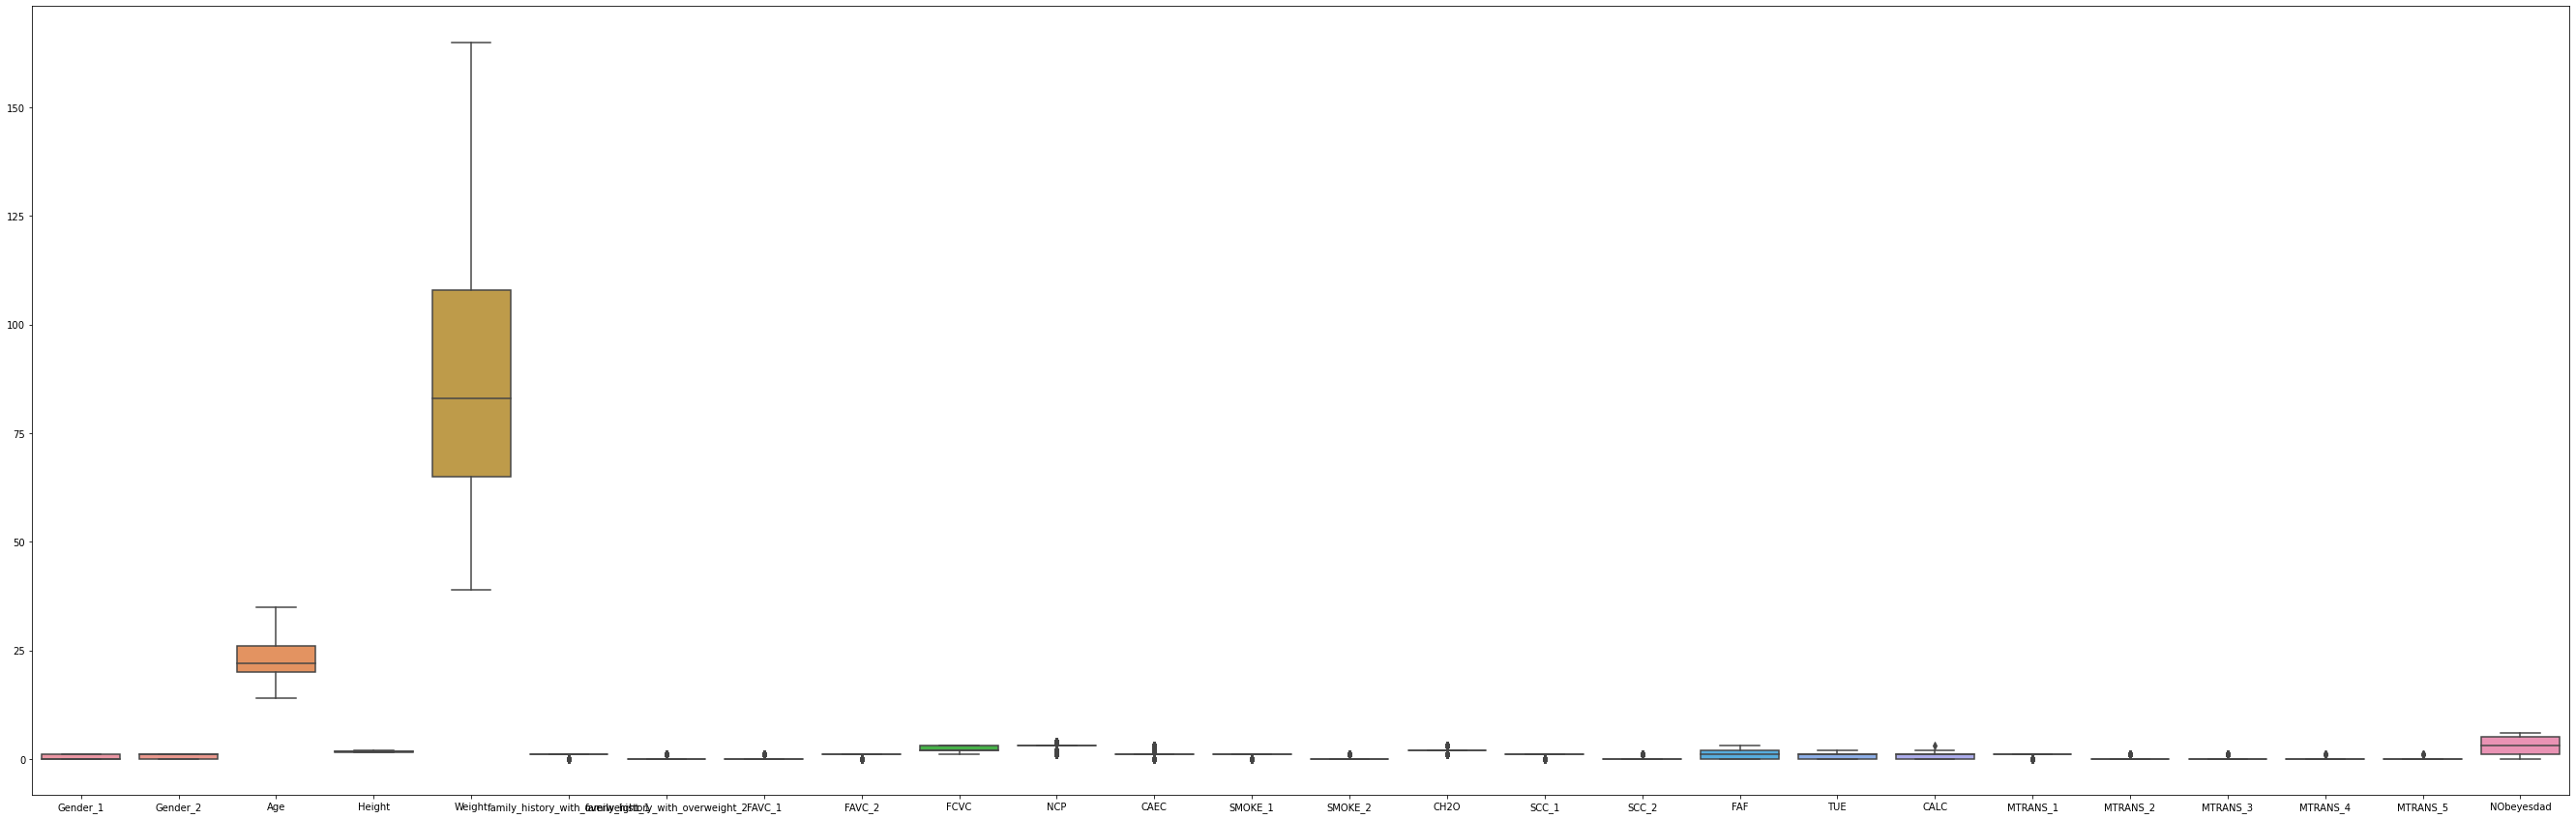

In [38]:
# Boxplot to view the data
plt.figure(figsize=(47,15)) 
ax = sns.boxplot(data=data_ord_enc)

In [39]:
# StandardScaler
scale = StandardScaler()
scaled_data = data_ord_enc.iloc[:, :-1] 
scaled_data = scale.fit_transform(scaled_data)

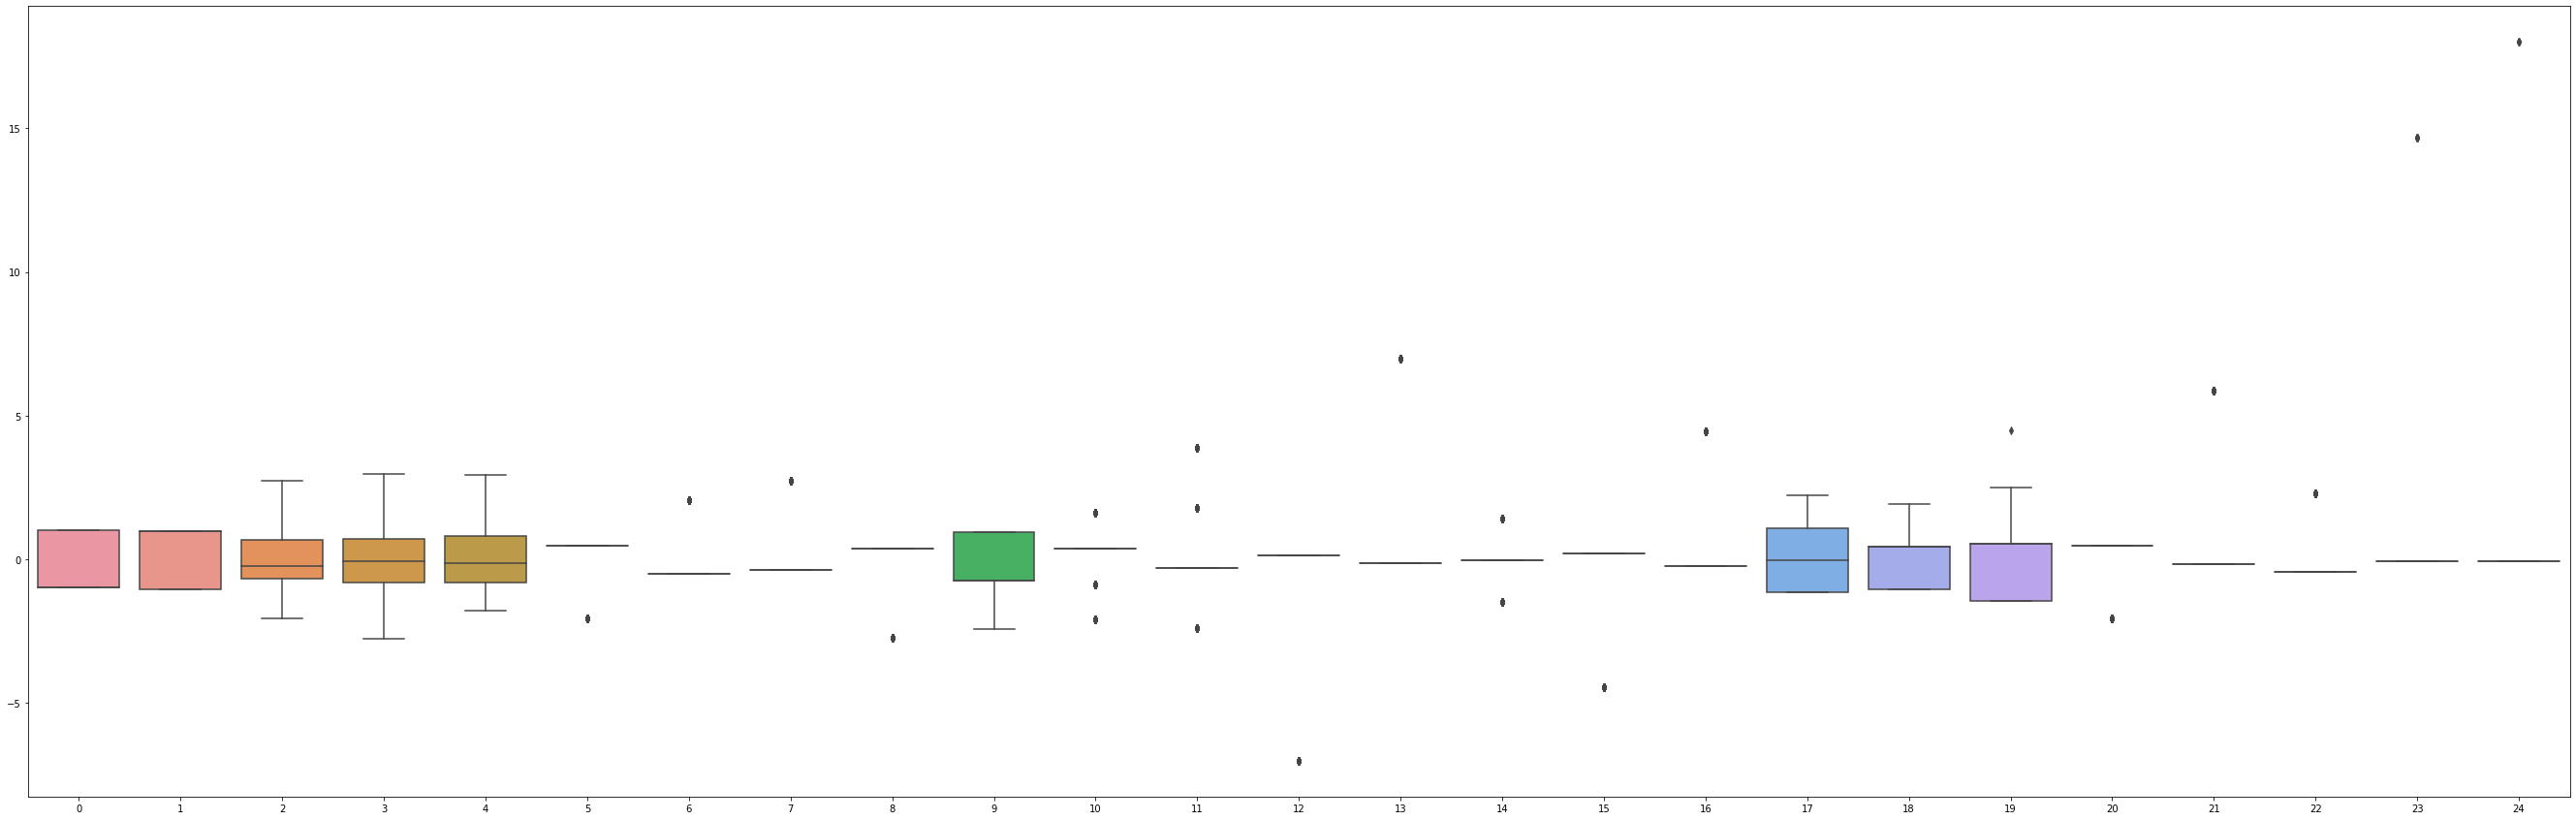

In [40]:
# Boxplot to view the scale data
plt.figure(figsize=(47,15)) 
ax = sns.boxplot(data=scaled_data)

In [41]:
# Descriptive Statistics of Scaled Data
scaled_data_df = pd.DataFrame(scaled_data)
scaled_data_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
count,1.950000e+03,1.950000e+03,1.950000e+03,1.950000e+03,1.950000e+03,1.950000e+03,1.950000e+03,1.950000e+03,1.950000e+03,1.950000e+03,...,1.950000e+03,1.950000e+03,1.950000e+03,1.950000e+03,1.950000e+03,1.950000e+03,1.950000e+03,1.950000e+03,1.950000e+03,1.950000e+03
mean,-1.933496e-16,1.933496e-16,3.079019e-16,-1.715437e-16,-1.360052e-15,-8.516720e-15,8.520535e-15,-1.701374e-15,1.701374e-15,-5.282726e-15,...,-3.329957e-15,3.330641e-15,-9.123756e-18,-1.109084e-16,1.262466e-15,-2.381969e-15,-3.569879e-15,-1.231323e-15,9.936069e-16,-1.183889e-15
std,1.000257e+00,1.000257e+00,1.000257e+00,1.000257e+00,1.000257e+00,1.000257e+00,1.000257e+00,1.000257e+00,1.000257e+00,1.000257e+00,...,1.000257e+00,1.000257e+00,1.000257e+00,1.000257e+00,1.000257e+00,1.000257e+00,1.000257e+00,1.000257e+00,1.000257e+00,1.000257e+00
min,-9.716828e-01,-1.029142e+00,-2.055573e+00,-2.762150e+00,-1.778860e+00,-2.059596e+00,-4.855321e-01,-3.656787e-01,-2.734641e+00,-2.419677e+00,...,-4.443499e+00,-2.250479e-01,-1.142587e+00,-1.040067e+00,-1.442448e+00,-2.035956e+00,-1.703636e-01,-4.339353e-01,-6.809394e-02,-5.555556e-02
25%,-9.716828e-01,-1.029142e+00,-6.851128e-01,-8.128284e-01,-8.070566e-01,4.855321e-01,-4.855321e-01,-3.656787e-01,3.656787e-01,-7.291109e-01,...,2.250479e-01,-2.250479e-01,-1.142587e+00,-1.040067e+00,-1.442448e+00,4.911696e-01,-1.703636e-01,-4.339353e-01,-6.809394e-02,-5.555556e-02
50%,-9.716828e-01,9.716828e-01,-2.282929e-01,-5.475873e-02,-1.342698e-01,4.855321e-01,-4.855321e-01,-3.656787e-01,3.656787e-01,-7.291109e-01,...,2.250479e-01,-2.250479e-01,-2.071154e-02,4.392407e-01,5.300441e-01,4.911696e-01,-1.703636e-01,-4.339353e-01,-6.809394e-02,-5.555556e-02
75%,1.029142e+00,9.716828e-01,6.853471e-01,7.033110e-01,8.001563e-01,4.855321e-01,-4.855321e-01,-3.656787e-01,3.656787e-01,9.614555e-01,...,2.250479e-01,-2.250479e-01,1.101164e+00,4.392407e-01,5.300441e-01,4.911696e-01,-1.703636e-01,-4.339353e-01,-6.809394e-02,-5.555556e-02
max,1.029142e+00,9.716828e-01,2.741037e+00,2.977520e+00,2.930648e+00,4.855321e-01,2.059596e+00,2.734641e+00,3.656787e-01,9.614555e-01,...,2.250479e-01,4.443499e+00,2.223039e+00,1.918549e+00,4.475029e+00,4.911696e-01,5.869799e+00,2.304491e+00,1.468559e+01,1.800000e+01


# Regression

In [42]:
# OLS

X = data_ord_enc.iloc[:, :-1]
y = data_ord_enc.iloc[:,-1]

X = sm.add_constant(X)
model = sm.OLS(y,X) 
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             NObeyesdad   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     2132.
Date:                Thu, 18 May 2023   Prob (F-statistic):               0.00
Time:                        13:08:53   Log-Likelihood:                -1139.8
No. Observations:                1950   AIC:                             2320.
Df Residuals:                    1930   BIC:                             2431.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [43]:
# New model without FCVC, CH2O, and TUE columns
X2 = data_ord_enc.drop(['FCVC', 'CH2O', 'TUE', 'NObeyesdad'], axis=1)
y = data_ord_enc.iloc[:,-1]

X2 = sm.add_constant(X2)
model = sm.OLS(y,X2) 
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             NObeyesdad   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     2535.
Date:                Thu, 18 May 2023   Prob (F-statistic):               0.00
Time:                        13:09:09   Log-Likelihood:                -1140.0
No. Observations:                1950   AIC:                             2314.
Df Residuals:                    1933   BIC:                             2409.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [44]:
results.params

const                               2.280769
Gender_1                            1.103247
Gender_2                            1.177521
Age                                 0.032054
Height                             -7.484622
Weight                              0.076427
family_history_with_overweight_1    1.300206
family_history_with_overweight_2    0.980563
FAVC_1                              1.122252
FAVC_2                              1.158516
NCP                                 0.045345
CAEC                               -0.144659
SMOKE_1                             1.187133
SMOKE_2                             1.093636
SCC_1                               1.168538
SCC_2                               1.112230
FAF                                -0.079234
CALC                               -0.089802
MTRANS_1                            0.540775
MTRANS_2                            0.410988
MTRANS_3                            0.328396
MTRANS_4                            0.469979
MTRANS_5  

In [45]:
X2 = data_ord_enc.drop(['FCVC', 'CH2O', 'TUE', 'NObeyesdad'], axis=1)
y = data_ord_enc.iloc[:,-1].values.reshape(-1,1)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=.3, random_state=0)

In [47]:
lr = LinearRegression()
model = lr.fit(X_train,y_train)

In [48]:

predictions = lr.predict(X_test)

prediction = np.around(predictions)
prediction = prediction.astype(int)

In [49]:
print('intercept: ', lr.intercept_)
print('coefficient: ', lr.coef_)

intercept:  [8.49751217]
coefficient:  [[-3.35643226e-02  3.35643226e-02  3.43088228e-02 -7.45928391e+00
   7.59449576e-02  1.71416948e-01 -1.71416948e-01 -2.05520883e-02
   2.05520883e-02  4.13876925e-02 -1.48308145e-01  6.68225265e-03
  -6.68225265e-03  5.64057868e-03 -5.64057868e-03 -7.70810635e-02
  -9.74221514e-02  4.36452986e-02  1.36285569e-02 -1.98593784e-01
  -9.52483568e-02  2.36568285e-01]]


In [50]:
X_test.columns

Index(['Gender_1', 'Gender_2', 'Age', 'Height', 'Weight',
       'family_history_with_overweight_1', 'family_history_with_overweight_2',
       'FAVC_1', 'FAVC_2', 'NCP', 'CAEC', 'SMOKE_1', 'SMOKE_2', 'SCC_1',
       'SCC_2', 'FAF', 'CALC', 'MTRANS_1', 'MTRANS_2', 'MTRANS_3', 'MTRANS_4',
       'MTRANS_5'],
      dtype='object')

In [51]:
reload(plt)

<module 'matplotlib.pyplot' from 'C:\\Users\\SHIVAM GUPTA\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [52]:
# Performance Metrics
# MAE
MAE = mean_absolute_error(y_test, prediction)
print('MAE: {:0.2f}'.format(MAE))

MAE: 0.21


In [53]:
# r2_score: 1 is perfect prediction
r2_score = r2_score(y_test, prediction)
print('r2_score: {:0.2f}'.format(r2_score))

r2_score: 0.95


In [54]:
# Cross Validation
result_cv = cross_val_score(lr, X_test, y_test, cv = 10)
print('Cross Validation: {}'.format(result_cv))
print("%0.2f accuracy with a standard deviation of %0.2f" % (result_cv.mean(), result_cv.std()))

Cross Validation: [0.94246516 0.93980695 0.95957854 0.95475372 0.93143792 0.96420775
 0.94449866 0.96796544 0.95833539 0.94054892]
0.95 accuracy with a standard deviation of 0.01


In [55]:
result_lr = np.concatenate((prediction.reshape(len(prediction),1),y_test.reshape(len(y_test),1)),1)
result_lr

array([[2, 2],
       [5, 5],
       [5, 5],
       ...,
       [6, 6],
       [5, 5],
       [3, 2]])

In [56]:
# Reverse the change made with the one-hot encoder

def undummify(data_ord_enc, prefix_sep = '_'):
    cols2collapse = {
        item.split(prefix_sep)[0]: (prefix_sep in item) for item in data_ord_enc.columns
    }
    series_list = []
    for col, needs_to_collapse in cols2collapse.items():
        if needs_to_collapse:
            undummified = (
                data_ord_enc.filter(like=col)
                .idxmax(axis=1)
                .apply(lambda x: x.split(prefix_sep, maxsplit=1)[1])
                .rename(col)
            )
            series_list.append(undummified)
        else:
            series_list.append(data_ord_enc[col])
    undummified_df = pd.concat(series_list, axis=1)
    return undummified_df

In [57]:
X_reverse = undummify(X_test)
X_reverse

,Gender,Age,Height,Weight,family,FAVC,NCP,CAEC,SMOKE,SCC,FAF,CALC,MTRANS
19,1,23,1.65,70,history_with_overweight_1,1,1,1,1,1,0,1,1
1664,2,27,1.65,100,history_with_overweight_1,2,2,1,1,1,1,0,1
1766,2,31,1.86,126,history_with_overweight_1,2,3,1,1,1,1,1,1
203,2,29,1.69,90,history_with_overweight_1,1,3,1,1,1,1,1,3
357,1,17,1.70,56,history_with_overweight_1,2,3,1,1,1,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,2,18,1.75,51,history_with_overweight_2,2,3,1,1,1,1,1,1
1047,2,20,1.70,79,history_with_overweight_1,1,3,1,1,1,2,1,1
1863,1,19,1.67,125,history_with_overweight_1,2,3,1,1,1,1,1,1
1602,2,30,1.76,112,history_with_overweight_1,2,3,1,1,1,0,1,3


In [58]:
# Concatenate the data to compare predictions with the real target.
X_reverse = X_reverse.reset_index(drop = True)
y_compare = pd.DataFrame(result_lr)
y_compare = y_compare.rename(index=str, columns={0:'prediction', 1:'y_test'})
y_compare = y_compare.reset_index(drop=True)

final_result = pd.concat([y_compare, X_reverse], axis=1)
final_result

,prediction,y_test,Gender,Age,Height,Weight,family,FAVC,NCP,CAEC,SMOKE,SCC,FAF,CALC,MTRANS
0,2,2,1,23,1.65,70,history_with_overweight_1,1,1,1,1,1,0,1,1
1,5,5,2,27,1.65,100,history_with_overweight_1,2,2,1,1,1,1,0,1
2,5,5,2,31,1.86,126,history_with_overweight_1,2,3,1,1,1,1,1,1
3,4,4,2,29,1.69,90,history_with_overweight_1,1,3,1,1,1,1,1,3
4,1,1,1,17,1.70,56,history_with_overweight_1,2,3,1,1,1,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580,0,0,2,18,1.75,51,history_with_overweight_2,2,3,1,1,1,1,1,1
581,2,3,2,20,1.70,79,history_with_overweight_1,1,3,1,1,1,2,1,1
582,6,6,1,19,1.67,125,history_with_overweight_1,2,3,1,1,1,1,1,1
583,5,5,2,30,1.76,112,history_with_overweight_1,2,3,1,1,1,0,1,3


# Classification

In [59]:
X_clas = scaled_data
y_clas = data_ord_enc.iloc[:, -1] 

In [60]:
# Split again the training and test size
scaled_X_train, scaled_X_test, y_train, y_test = train_test_split(X_clas, y_clas, test_size=.3, random_state=0)

In [61]:
# Let's start with Naive Bayes
gnb = GaussianNB()
cv_gnb = cross_val_score(gnb,scaled_X_train,y_train,cv=10)
print(cv_gnb)
print(cv_gnb.mean())

[0.48905109 0.51094891 0.51094891 0.38686131 0.54014599 0.51470588
 0.5        0.52205882 0.46323529 0.47794118]
0.491589738085015


In [62]:
# Logistic Regression
lor = LogisticRegression(max_iter = 2000)
cv_lor = cross_val_score(lor,scaled_X_train,y_train,cv=10)
print(cv_lor)
print(cv_lor.mean())

[0.81751825 0.84671533 0.89051095 0.77372263 0.86861314 0.84558824
 0.90441176 0.84558824 0.83088235 0.86029412]
0.8483844997853156


In [63]:
# Decision Tree
dt = tree.DecisionTreeClassifier(random_state = 1)
cv_dt = cross_val_score(dt,scaled_X_train,y_train,cv=10)
print(cv_dt)
print(cv_dt.mean())

[0.94890511 0.95620438 0.89781022 0.9270073  0.91240876 0.91176471
 0.94117647 0.94117647 0.94117647 0.94852941]
0.9326159295835122


In [64]:
dt.fit(scaled_X_train,y_train)

DecisionTreeClassifier(random_state=1)

In [65]:
prediction_dt = dt.predict(scaled_X_test)
print('Accuracy of Decision Tree: {:.2f}'.format(dt.score(scaled_X_test,y_test)))

Accuracy of Decision Tree: 0.95


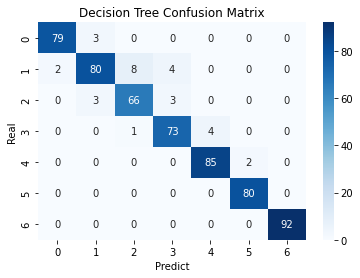

In [66]:
# Confusion Matrix
cmdt = confusion_matrix(y_test, prediction_dt)
sns.heatmap(cmdt,annot=True,fmt='g',cmap="Blues")
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predict")
plt.ylabel("Real")
plt.show()

In [67]:
# Random Forest 
rf = RandomForestClassifier(random_state = 1)
cv_rf = cross_val_score(rf,scaled_X_train,y_train,cv=10)
print(cv_rf)
print(cv_rf.mean())

[0.90510949 0.94160584 0.94160584 0.89781022 0.93430657 0.94852941
 0.96323529 0.90441176 0.93382353 0.94117647]
0.9311614426792614


In [68]:
rf.fit(scaled_X_train,y_train)

RandomForestClassifier(random_state=1)

In [69]:
prediction_rf = rf.predict(scaled_X_test)
print('Accuracy of Random Forest: {:.2f}'.format(rf.score(scaled_X_test,y_test)))

Accuracy of Random Forest: 0.94


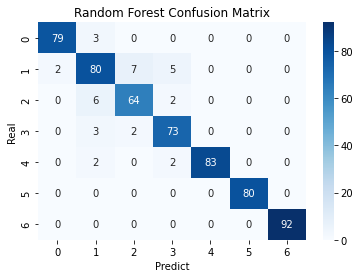

In [70]:
# Confusion Matrix
cmrf = confusion_matrix(y_test, prediction_rf)
sns.heatmap(cmrf,annot=True,fmt='g',cmap="Blues")
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predict")
plt.ylabel("Real")
plt.show()

In [71]:
# k-nearest neighbors (KNN)
knn = KNeighborsClassifier()
cv_knn = cross_val_score(knn,scaled_X_train,y_train,cv=10)
print(cv_knn)
print(cv_knn.mean())

[0.7810219  0.77372263 0.73722628 0.72262774 0.77372263 0.80147059
 0.81617647 0.74264706 0.75735294 0.79411765]
0.7700085873765565


In [72]:
# Support Vector Classifier
svc = SVC(probability = True)
cv_svc = cross_val_score(svc,scaled_X_train,y_train,cv=10)
print(cv_svc)
print(cv_svc.mean())

[0.80291971 0.84671533 0.81021898 0.79562044 0.84671533 0.82352941
 0.86764706 0.86764706 0.80882353 0.84558824]
0.8315425075139544


In [73]:
# K-means: centroids-based clustering
X_clust = data_ord_enc.iloc[:, [17,25]].values
print(X_clust)

[[0 1]
 [3 1]
 [2 1]
 ...
 [1 6]
 [1 6]
 [1 6]]


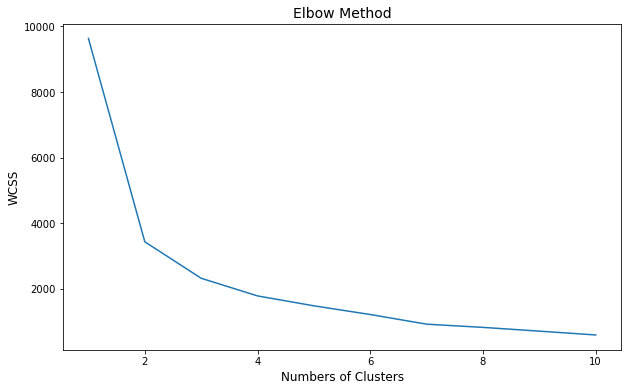

In [74]:
# Elbow Method: is use to find out the number of clusters in K-means
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(X_clust)
    wcss.append(kmeans.inertia_)
plt.figure(figsize = (10,6))
plt.plot(range(1,11), wcss)
plt.xlabel('Numbers of Clusters', fontsize=12)
plt.ylabel('WCSS', fontsize=12)
plt.title('Elbow Method', fontsize=14)
plt.show()

In [75]:
k = 7
kmeans = KMeans(n_clusters = 7, random_state = 0)
pred_k = kmeans.fit_predict(X_clust)
print(pred_k)

[6 2 2 ... 5 5 5]


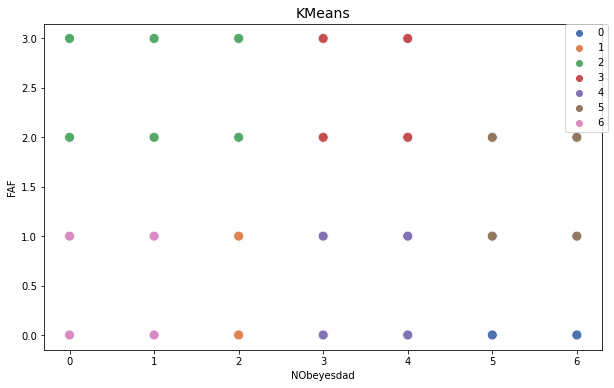

In [76]:
plt.figure(figsize = (10,6))
sns.scatterplot(data = data_ord_enc, x = 'NObeyesdad', y = 'FAF', hue = pred_k, palette = "deep", s = 100)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.title("KMeans", fontsize=14)
plt.show()

In [77]:
data_kmeans = data_iqr.copy()
data_kmeans['Cluster'] = pred_k
print(data_kmeans.head())

   Gender  Age  Height  Weight family_history_with_overweight FAVC  FCVC  NCP  \
0  Female   21    1.62      64                            yes   no     2    3   
1  Female   21    1.52      56                            yes   no     3    3   
2    Male   23    1.80      77                            yes   no     2    3   
3    Male   27    1.80      87                             no   no     3    3   
4    Male   22    1.78      90                             no   no     2    1   

        CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC                 MTRANS  \
0  Sometimes    no     2   no    0    1          no  Public_Transportation   
1  Sometimes   yes     3  yes    3    0   Sometimes  Public_Transportation   
2  Sometimes    no     2   no    2    1  Frequently  Public_Transportation   
3  Sometimes    no     2   no    2    0  Frequently                Walking   
4  Sometimes    no     2   no    0    0   Sometimes  Public_Transportation   

            NObeyesdad  Cluster  
0        N

In [78]:
boolArray = data_kmeans['Cluster'] == 0
print(data_kmeans[boolArray])

      Gender  Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
68      Male   30    1.76     112                            yes  yes     1   
202   Female   26    1.56     102                            yes  yes     3   
210     Male   20    1.80     114                            yes  yes     2   
229     Male   32    1.75     120                            yes   no     3   
398     Male   21    1.85     125                            yes  yes     3   
...      ...  ...     ...     ...                            ...  ...   ...   
2098  Female   26    1.61     105                            yes  yes     3   
2099  Female   26    1.63     108                            yes  yes     3   
2100  Female   26    1.63     107                            yes  yes     3   
2101  Female   26    1.63     107                            yes  yes     3   
2102  Female   26    1.63     108                            yes  yes     3   

      NCP        CAEC SMOKE  CH2O  SCC  FAF  TUE   

In [79]:
# Performance Metrics
kmeans_metrics = silhouette_score(X_clust, kmeans.labels_, metric = 'euclidean')
print('The Silhouette_Score of K-means is: {:0.2f}'.format(kmeans_metrics))

The Silhouette_Score of K-means is: 0.49


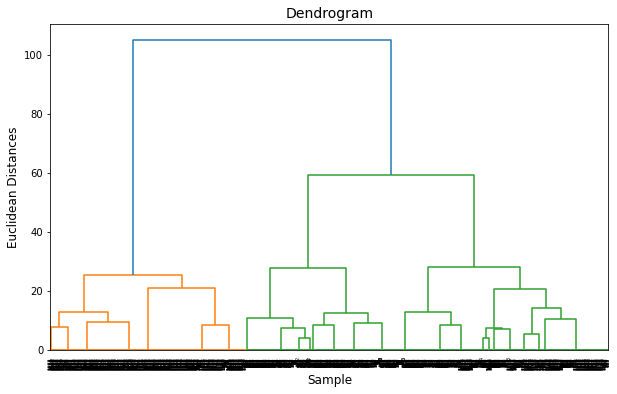

In [80]:
# Agglomerative Hierarchical
# Dendrogram method
plt.figure(figsize = (10,6))
hc = sch.dendrogram(sch.linkage(X_clust, method = 'ward'))
plt.title('Dendrogram', fontsize=14)
plt.xlabel('Sample', fontsize=12)
plt.ylabel('Euclidean Distances', fontsize=12)
plt.show()

In [81]:
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward' )
pred_h = hc.fit_predict(X_clust)

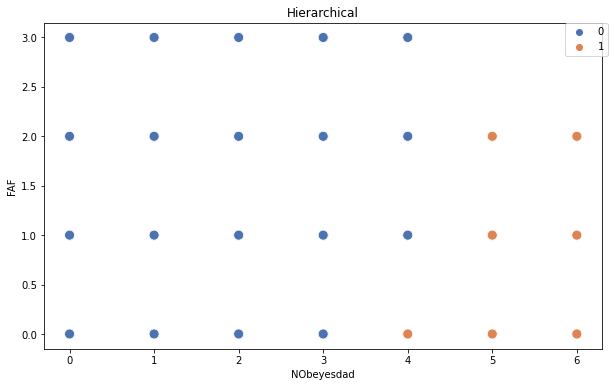

In [82]:
plt.figure(figsize = (10,6))
sns.scatterplot(data = data_ord_enc, x = 'NObeyesdad', y = 'FAF', hue = pred_h, palette = "deep", s = 100)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.title("Hierarchical", fontsize=12)
plt.show()

In [83]:
data_hc = data_iqr.copy()
data_hc['Cluster'] = pred_h
print(data_hc.head())

   Gender  Age  Height  Weight family_history_with_overweight FAVC  FCVC  NCP  \
0  Female   21    1.62      64                            yes   no     2    3   
1  Female   21    1.52      56                            yes   no     3    3   
2    Male   23    1.80      77                            yes   no     2    3   
3    Male   27    1.80      87                             no   no     3    3   
4    Male   22    1.78      90                             no   no     2    1   

        CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC                 MTRANS  \
0  Sometimes    no     2   no    0    1          no  Public_Transportation   
1  Sometimes   yes     3  yes    3    0   Sometimes  Public_Transportation   
2  Sometimes    no     2   no    2    1  Frequently  Public_Transportation   
3  Sometimes    no     2   no    2    0  Frequently                Walking   
4  Sometimes    no     2   no    0    0   Sometimes  Public_Transportation   

            NObeyesdad  Cluster  
0        N

In [84]:
boolArrayhc = data_hc['Cluster'] == 1
print(data_hc[boolArrayhc])

      Gender  Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
17    Female   29    1.53      78                             no  yes     2   
23    Female   22    1.60      82                            yes  yes     1   
67      Male   23    1.65      95                            yes  yes     2   
68      Male   30    1.76     112                            yes  yes     1   
78    Female   23    1.65      90                            yes  yes     2   
...      ...  ...     ...     ...                            ...  ...   ...   
2106  Female   21    1.71     131                            yes  yes     3   
2107  Female   22    1.75     134                            yes  yes     3   
2108  Female   23    1.75     134                            yes  yes     3   
2109  Female   24    1.74     133                            yes  yes     3   
2110  Female   24    1.74     133                            yes  yes     3   

      NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE    

In [85]:
# Performance Metrics
hc_metrics = silhouette_score(X_clust, hc.labels_, metric = 'euclidean')
print('The Silhouette_Score of Hierarchical is: {:0.2f}'.format(hc_metrics))

The Silhouette_Score of Hierarchical is: 0.47


In [86]:
# DBSCAN
# Various values of eps and min_samples were tested and the values that gave the best silhouette score result were eps = .5 and min_samples = 15
dbscan = DBSCAN(eps = .5, min_samples = 15)
dbscan.fit(X_clust)
pred_d = dbscan.labels_
print(pred_d)

[ 0  1  2 ... 24 24 24]


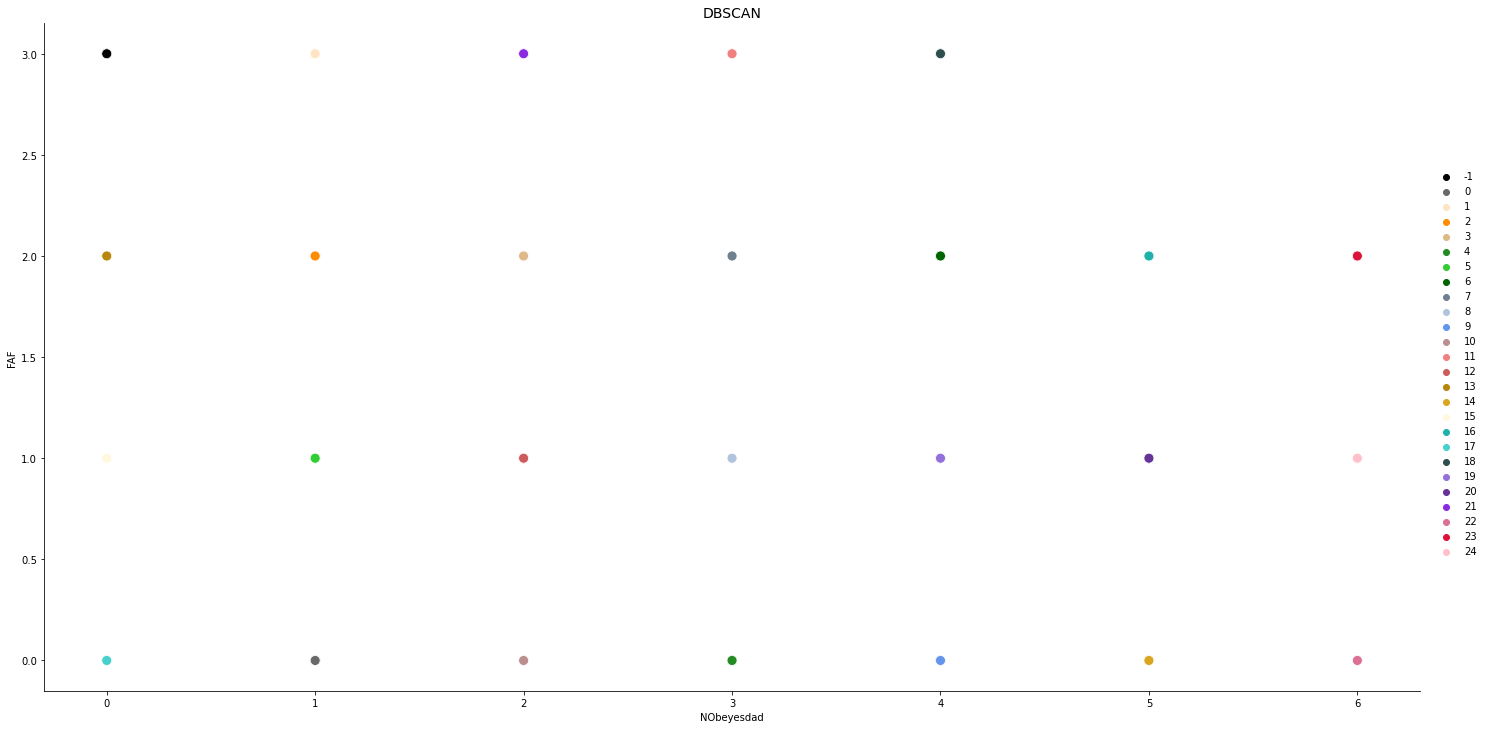

In [87]:
sns.relplot(x = 'NObeyesdad', y = 'FAF', hue = pred_d, data = data_ord_enc, palette = ["black", "dimgray", "bisque", "darkorange", "burlywood", 
"forestgreen", "limegreen", "darkgreen", "slategrey", "lightsteelblue", "cornflowerblue", "rosybrown", "lightcoral", "indianred", "darkgoldenrod",
"goldenrod", "cornsilk", "lightseagreen", "mediumturquoise", "darkslategray", "mediumpurple", "rebeccapurple", "blueviolet", "palevioletred", "crimson",
"pink"], s = 100, height=10,aspect=2)
plt.title("DBSCAN", fontsize=14)
plt.show()

In [88]:
data_d = data_iqr.copy()
data_d['Cluster'] = pred_d
print(data_d.head())

   Gender  Age  Height  Weight family_history_with_overweight FAVC  FCVC  NCP  \
0  Female   21    1.62      64                            yes   no     2    3   
1  Female   21    1.52      56                            yes   no     3    3   
2    Male   23    1.80      77                            yes   no     2    3   
3    Male   27    1.80      87                             no   no     3    3   
4    Male   22    1.78      90                             no   no     2    1   

        CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC                 MTRANS  \
0  Sometimes    no     2   no    0    1          no  Public_Transportation   
1  Sometimes   yes     3  yes    3    0   Sometimes  Public_Transportation   
2  Sometimes    no     2   no    2    1  Frequently  Public_Transportation   
3  Sometimes    no     2   no    2    0  Frequently                Walking   
4  Sometimes    no     2   no    0    0   Sometimes  Public_Transportation   

            NObeyesdad  Cluster  
0        N

In [89]:
boolArraydb = data_d['Cluster'] == 22
print(data_d[boolArraydb])

      Gender  Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
202   Female   26    1.56     102                            yes  yes     3   
403   Female   26    1.66     112                            yes   no     3   
498   Female   25    1.69     105                            yes  yes     3   
500   Female   26    1.62     111                            yes  yes     3   
502   Female   22    1.84     165                            yes  yes     3   
...      ...  ...     ...     ...                            ...  ...   ...   
2098  Female   26    1.61     105                            yes  yes     3   
2099  Female   26    1.63     108                            yes  yes     3   
2100  Female   26    1.63     107                            yes  yes     3   
2101  Female   26    1.63     107                            yes  yes     3   
2102  Female   26    1.63     108                            yes  yes     3   

      NCP       CAEC SMOKE  CH2O SCC  FAF  TUE     

In [90]:
# Performance Metrics
dbscan_metrics = silhouette_score(X_clust, dbscan.labels_, metric = 'euclidean')
print('The Silhouette_Score of DBSCAN is: {:0.2f}'.format(dbscan_metrics))

The Silhouette_Score of DBSCAN is: 1.00


DBSCAN had the best performance among the clustering algorithms, with Silhouette Score = 1. And as you can see above, it grouped people with the highest level of NObeyesdad (Obesity_Type_III) and the lowest level of FAF (0), in a total of 187 people.